In [1]:
from PIL import Image
import numpy as np

# chair이미지 해상도 통일하여 적용하기 

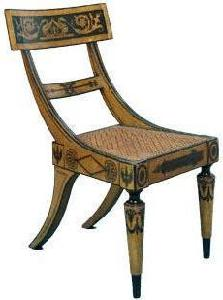

In [2]:
# image 불러오기
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [3]:
# 배열확인
np.array(img).shape

(300, 223, 3)

In [4]:
# 너비 해상도 구하기
np.array(img).shape[1]

223

---
### chair 전체 이미지의 해상도 평균 구하기

In [5]:
import glob

In [6]:
widthRatio = []
heightRatio = []
for file in glob.glob("../Data/cnn/chair/*.jpg"):
    img = np.array(Image.open(file),dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [7]:
print(np.mean(widthRatio))
print(np.mean(heightRatio))

230.69354838709677
296.98387096774195


In [8]:
len(widthRatio) == len(heightRatio)

True

---
# Chair의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [9]:
# Chair의 파일갯수(62개)와 laptop의(파일갯수 81게)를 60개로 맞추기
i = 0
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((231,297), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L') # Grayscale, 투명도가 있는 경우에믄 LA
    imgResize.save("../Data/cnn/new_chair/image_%04d.jpg"%i,'JPEG')
    i+=1
    if i >=60:
        break

---
# Laptop의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [10]:
# Chair의 파일갯수(62개)와 laptop의(파일갯수 81게)를 60개로 맞추기
i = 0
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((231,297), Image.Resampling.LANCZOS)
    imgResize = imgResize.convert('L') # Grayscale, 투명도가 있는 경우에믄 LA
    imgResize.save("../Data/cnn/new_laptop/image_%04d.jpg"%i,'JPEG')
    i+=1
    if i >=60:
        break

In [11]:
# image를 numpy로 변경하기
number_of_data = 60
image_width_size = 231
image_height_size = 297

In [12]:
chairData = np.zeros(number_of_data*image_width_size*image_height_size, dtype=np.int32).reshape(number_of_data,image_height_size,image_width_size)

In [13]:
chairData.shape

(60, 297, 231)

In [17]:
i = 0
for file in sorted(glob.glob("../Data/cnn/new_chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i+=1

In [15]:
laptopData = np.zeros(number_of_data*image_width_size*image_height_size, dtype=np.int32).reshape(number_of_data,image_height_size,image_width_size)
laptopData.shape

(60, 297, 231)

In [16]:
i = 0
for file in sorted(glob.glob("../Data/cnn/new_laptop/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i,:,:] = img
    i+=1

---
# nupmy data를 train data로 합치기

In [18]:
train = np.concatenate([chairData,laptopData])
train.shape

(120, 297, 231)

In [19]:
target = np.concatenate([np.zeros(60),np.ones(60)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])